In [ ]:
!pip install tensorflow
!pip install numpy

In [ ]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as pl
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:



(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print('x_train.shape =',x_train.shape)
print('y_train.shape =',y_train.shape)
print('x_test.shape =',x_test.shape)
print('y_test.shape =',y_test.shape)


x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
x_test.shape = (10000, 28, 28)
y_test.shape = (10000,)


In [ ]:
print(" output of test data: ", y_test.shape)
num_classes = np.unique(y_test).shape[0]
print('num_classes =', num_classes)

 output of test data:  (10000,)
num_classes = 10


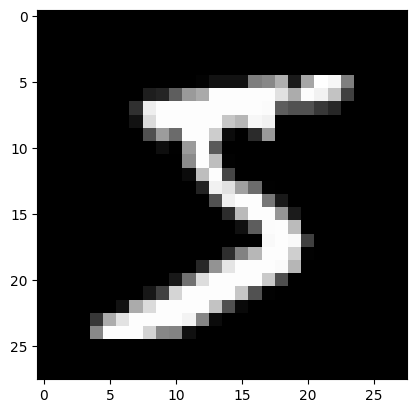

5


In [ ]:
image = x_train[0]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()
print(y_train[0])

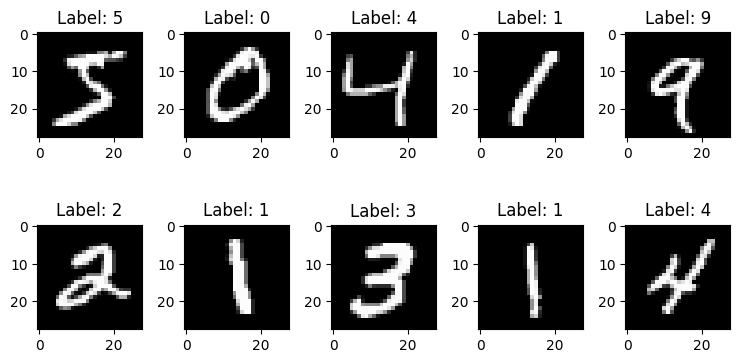

In [ ]:
num = 10
images = x_train[:num]
labels = y_train[:num]

num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [ ]:
#1. With Activation Function (ReLU)



# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0  # Normalize
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model with activation function
model_with_activation = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_with_activation.compile(optimizer='adam',
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

model_with_activation.summary()

history = model_with_activation.fit(x_train, y_train, epochs=5, validation_split=0.2)


pred = model_with_activation.predict(x_test)
pred = np.argmax(pred, axis = 1)[:5]
label = np.argmax(y_test,axis = 1)[:5]

print("Prediction of first 5 test data",pred)
print("Predicted labbel of test data",label)


score = model_with_activation.evaluate(x_test, y_test, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,898 (491.79 KB)

 Trainable params: 125,898 (491.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8610 - loss: 0.4564 - val_accuracy: 0.9615 - val_loss: 0.1254
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9646 - loss: 0.1138 - val_accuracy: 0.9660 - val_loss: 0.1131
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9748 - loss: 0.0761 - val_accuracy: 0.9713 - val_loss: 0.0956
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9814 - loss: 0.0558 - val_accuracy: 0.9686 - val_loss: 0.1069
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9844 - loss: 0.0465 - val_accuracy: 0.9746 - val_loss: 0.0911
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Prediction of first 5 test data [7 2 1 0 4]
Predicted labbel of test data [7 2 1 0 4]
Test loss: 0.07279457151889801
Test accuracy: 0.9793999791145325


In [ ]:

history = model_with_activation.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9908 - loss: 0.0304 - val_accuracy: 0.9747 - val_loss: 0.0889
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9906 - loss: 0.0279 - val_accuracy: 0.9754 - val_loss: 0.0930
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9935 - loss: 0.0206 - val_accuracy: 0.9745 - val_loss: 0.1006
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9927 - loss: 0.0214 - val_accuracy: 0.9758 - val_loss: 0.1110
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9933 - loss: 0.0178 - val_accuracy: 0.9738 - val_loss: 0.1192


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


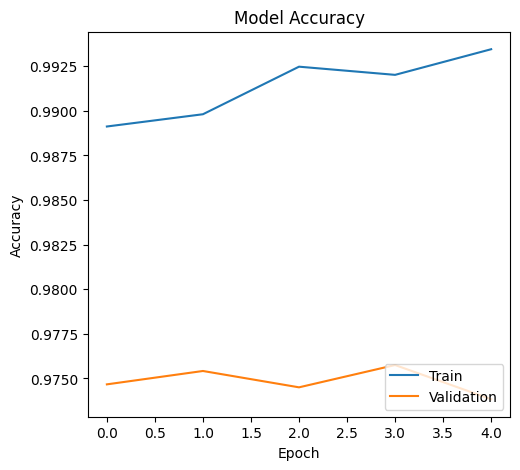

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

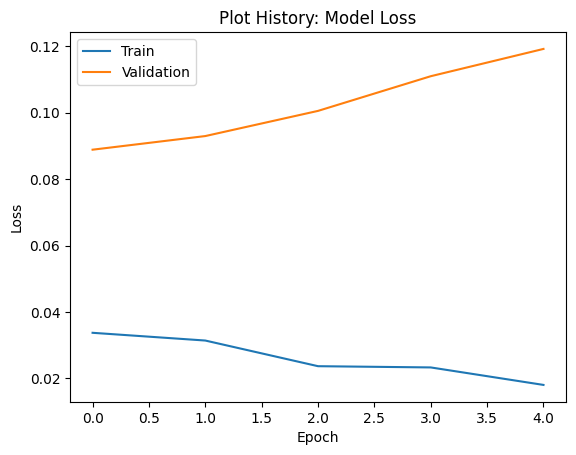

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot History: Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
score = model_with_activation.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11439741402864456
Test accuracy: 0.9746999740600586


In [ ]:
y_pred = model_with_activation.predict(x_test)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[6.3584756e-11 3.5974796e-11 8.4951746e-10 ... 9.9999994e-01
  8.8207700e-14 3.6121262e-10]
 [3.1604008e-11 1.9802656e-05 9.9998015e-01 ... 1.6107182e-11
  1.0210159e-09 7.1469411e-17]
 [2.1130320e-09 9.9999005e-01 2.4835840e-06 ... 5.9157023e-06
  7.4910247e-08 9.6119709e-12]
 ...
 [1.3919769e-18 1.6985518e-14 5.6216926e-19 ... 8.7987589e-10
  6.6014351e-15 2.1011046e-09]
 [1.9479311e-11 2.9311022e-12 5.7459055e-12 ... 6.1334736e-11
  1.9229187e-04 5.8815397e-15]
 [4.4936665e-10 1.4639324e-15 3.1317429e-12 ... 2.0839869e-16
  3.4302779e-11 5.4986079e-14]]


In [ ]:
#without activation function
#. Without Activation Function

# Model without activation function (purely linear)
model_without_activation = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128),  # No activation
    Dense(64),   # No activation
    Dense(10, activation='softmax')  # Output layer still needs softmax for classification
])

model_without_activation.compile(optimizer='adam',
                                 loss='categorical_crossentropy',
                                 metrics=['accuracy'])

model_without_activation.summary()
model_without_activation.fit(x_train, y_train, epochs=5, validation_split=0.2)

score = model_without_activation.evaluate(x_test, y_test, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8553 - loss: 0.4904 - val_accuracy: 0.9114 - val_loss: 0.3183
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9096 - loss: 0.3162 - val_accuracy: 0.9190 - val_loss: 0.2922
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9144 - loss: 0.3060 - val_accuracy: 0.9125 - val_loss: 0.3046
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9160 - loss: 0.2976 - val_accuracy: 0.9201 - val_loss: 0.2860
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9187 - loss: 0.2866 - val_accuracy: 0.9254 - val_loss: 0.2837
Test loss: 0.2919364869594574
Test accuracy: 0.9193000197410583


In [ ]:

history = model_without_activation.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9199 - loss: 0.2815 - val_accuracy: 0.9162 - val_loss: 0.2946
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9208 - loss: 0.2794 - val_accuracy: 0.9175 - val_loss: 0.3063
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9196 - loss: 0.2807 - val_accuracy: 0.9162 - val_loss: 0.2996
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9209 - loss: 0.2778 - val_accuracy: 0.9216 - val_loss: 0.2880
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9224 - loss: 0.2739 - val_accuracy: 0.9193 - val_loss: 0.2947


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


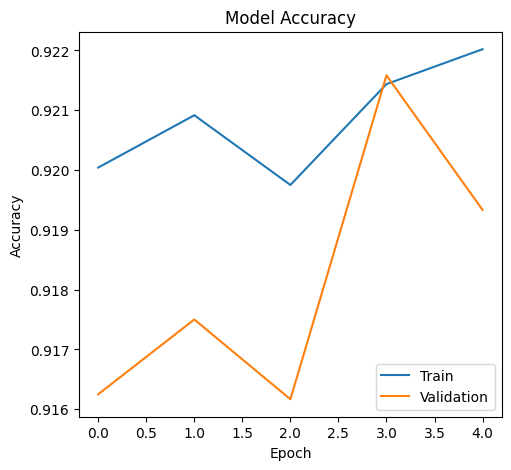

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

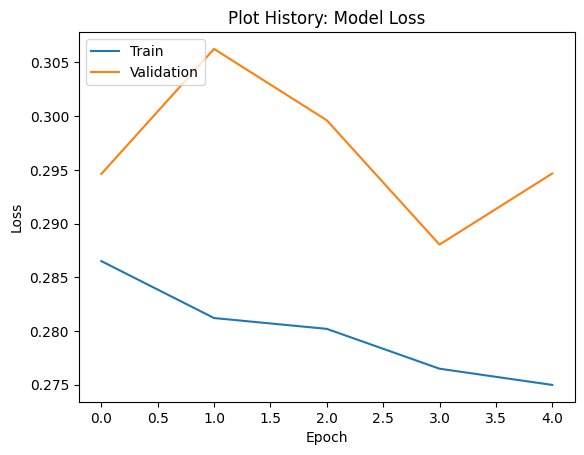

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot History: Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
score = model_without_activation.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.310695618391037
Test accuracy: 0.9117000102996826


In [ ]:
y_pred = model_without_activation.predict(x_test)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[5.5843634e-07 4.0916384e-15 2.4525070e-07 ... 9.9983454e-01
  3.1790537e-07 1.2356933e-04]
 [8.6133878e-05 1.4343740e-05 9.8840046e-01 ... 2.9349404e-18
  4.9240584e-04 2.0948740e-13]
 [1.1854257e-06 9.8471057e-01 3.3595506e-03 ... 1.8732110e-03
  6.5495726e-03 3.0966161e-04]
 ...
 [5.5262168e-09 2.5700031e-09 8.4539386e-07 ... 1.7375242e-03
  7.7647287e-03 1.5669798e-02]
 [2.4166236e-09 9.5107229e-09 4.8767439e-09 ... 1.0619458e-07
  1.0943791e-02 8.8615536e-07]
 [1.6328750e-07 3.8868262e-12 1.6178288e-05 ... 5.9125773e-12
  5.2587490e-07 1.0248700e-09]]


In [45]:
#deep model
#1. With Activation Function (ReLU)



# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0  # Normalize
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model with activation function
model_with_activation = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_with_activation.compile(optimizer='adam',
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

model_with_activation.summary()

history = model_with_activation.fit(x_train, y_train, epochs=5, validation_split=0.2)


pred = model_with_activation.predict(x_test)
pred = np.argmax(pred, axis = 1)[:5]
label = np.argmax(y_test,axis = 1)[:5]

print("Prediction of first 5 test data",pred)
print("Predicted labbel of test data",label)


score = model_with_activation.evaluate(x_test, y_test, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,994 (1007.79 KB)

 Trainable params: 257,994 (1007.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7568 - loss: 0.7130 - val_accuracy: 0.9542 - val_loss: 0.1762
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9511 - loss: 0.1851 - val_accuracy: 0.9614 - val_loss: 0.1479
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9656 - loss: 0.1328 - val_accuracy: 0.9666 - val_loss: 0.1388
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9707 - loss: 0.1109 - val_accuracy: 0.9647 - val_loss: 0.1369
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9773 - loss: 0.0926 - val_accuracy: 0.9681 - val_loss: 0.1361
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Prediction of first 5 test data [7 2 1 0 4]
Predicted labbel of test data [7 2 1 0 4]
Test loss: 0.1268462985754013
Test accuracy: 0.9685999751091003


In [46]:
#deep model
#1. With Activation Function (ReLU)



# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0  # Normalize
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model with activation function
model_with_activation = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_with_activation.compile(optimizer='adam',
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

model_with_activation.summary()

history = model_with_activation.fit(x_train, y_train, epochs=5, validation_split=0.2)


pred = model_with_activation.predict(x_test)
pred = np.argmax(pred, axis = 1)[:5]
label = np.argmax(y_test,axis = 1)[:5]

print("Prediction of first 5 test data",pred)
print("Predicted labbel of test data",label)


score = model_with_activation.evaluate(x_test, y_test, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 287,114 (1.10 MB)

 Trainable params: 287,114 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.5467 - loss: 1.1736 - val_accuracy: 0.9143 - val_loss: 0.3020
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9265 - loss: 0.2820 - val_accuracy: 0.9468 - val_loss: 0.2152
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9405 - loss: 0.2306 - val_accuracy: 0.9417 - val_loss: 0.2275
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9416 - loss: 0.2309 - val_accuracy: 0.9510 - val_loss: 0.2035
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9341 - loss: 0.2597 - val_accuracy: 0.9511 - val_loss: 0.2135
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Prediction of first 5 test data [7 2 1 0 4]
Predicted labbel of test data [7 2 1 0 4]
Test loss: 0.21145720779895782
Test accuracy: 0.949400007724762


In [47]:
#deep model
#1. With Activation Function (ReLU)



# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0  # Normalize
x_test = x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Model with activation function
model_with_activation = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_with_activation.compile(optimizer='adam',
                              loss='categorical_crossentropy',
                              metrics=['accuracy'])

model_with_activation.summary()

history = model_with_activation.fit(x_train, y_train, epochs=5, validation_split=0.2)


pred = model_with_activation.predict(x_test)
pred = np.argmax(pred, axis = 1)[:5]
label = np.argmax(y_test,axis = 1)[:5]

print("Prediction of first 5 test data",pred)
print("Predicted labbel of test data",label)


score = model_with_activation.evaluate(x_test, y_test, verbose = 0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8657 - loss: 0.4719 - val_accuracy: 0.9550 - val_loss: 0.1619
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9623 - loss: 0.1315 - val_accuracy: 0.9665 - val_loss: 0.1172
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9751 - loss: 0.0874 - val_accuracy: 0.9702 - val_loss: 0.0951
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9819 - loss: 0.0620 - val_accuracy: 0.9719 - val_loss: 0.0922
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9877 - loss: 0.0444 - val_accuracy: 0.9734 - val_loss: 0.0871
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Prediction of first 5 test data [7 2 1 0 4]
Predicted labbel of test data [7 2 1 0 4]
Test loss: 0.08466420322656631
Test accuracy: 0.9739000201225281
